In [1]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# hacky way to import modules from ../src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")

from counting import Counting, CountingNet

## Counting network architecture

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = CountingNet().to(device)
net

CountingNet(
  (cnn): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Co

***9 convolutional and 3 fully connected layers***

I was able to get the best results after adding BatchNorm1d layer right before softmax.

Train loss = 0.2074239099290636
Test loss = 0.9604332580566406
Train accuracy = 0.8936666666666667
Test accuracy = 0.604


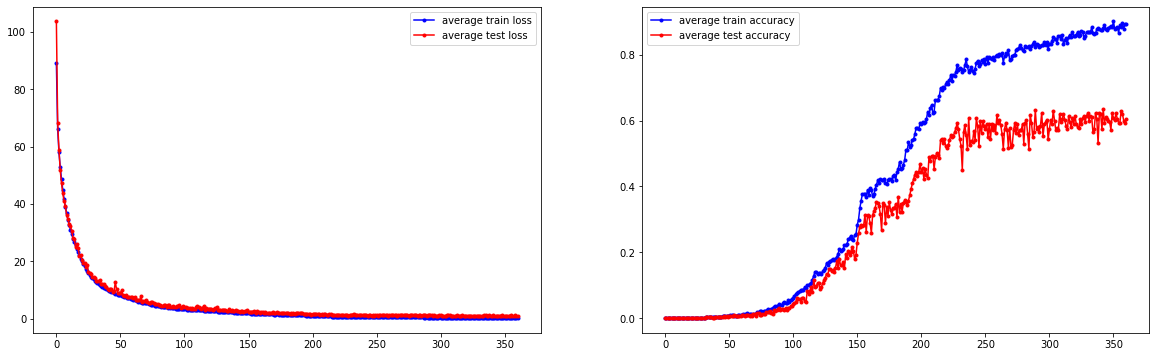

In [3]:
problem = Counting(net, dataset_path="../data/extracted", device=device)

problem.trainer.train(420, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

## Other architectures

In [3]:
def filter_layer(sequential, layer_type):
    is_not_this_layer = lambda layer: not isinstance(layer, layer_type)
    layer_list = filter(is_not_this_layer, sequential)
    return torch.nn.Sequential(*layer_list)

### Last batch normalization layer removed

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_without_last_batch_norm = CountingNet().to(device)
del net_without_last_batch_norm.linear[7]
net_without_last_batch_norm

CountingNet(
  (cnn): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Co

**This network learned faster than the first one, but had much lower accuracy.**

Train loss = 4.445982048882379
Test loss = 4.835619384765625
Train accuracy = 0.12133333333333333
Test accuracy = 0.103


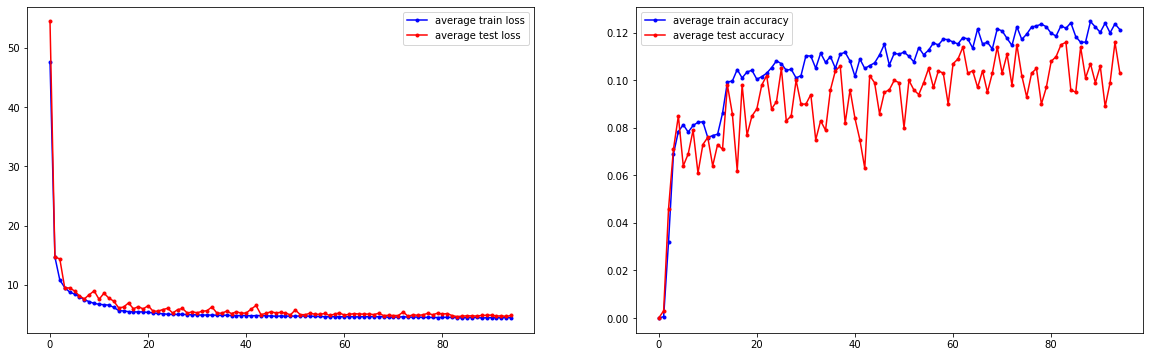

In [4]:
problem = Counting(
    net_without_last_batch_norm,
    dataset_path="../data/extracted",
    device=device
)

problem.trainer.train(420, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

### No batch normalization

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_without_batch_norm = CountingNet().to(device)
net_without_batch_norm.cnn = filter_layer(net_without_batch_norm.cnn, torch.nn.BatchNorm2d)
net_without_batch_norm.linear = filter_layer(net_without_batch_norm.linear, torch.nn.BatchNorm1d)

net_without_batch_norm

CountingNet(
  (cnn): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1,

Train loss = 47.864222222222224
Test loss = 47.74
Train accuracy = 0.0
Test accuracy = 0.0


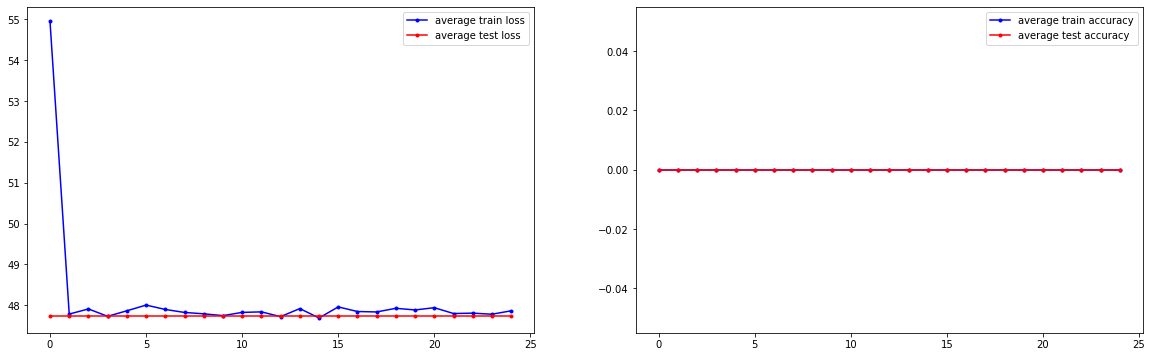

In [5]:
problem = Counting(
    net_without_batch_norm,
    dataset_path="../data/extracted",
    device=device
)

problem.trainer.train(420, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

**Removing batch normalization caused training to fail / take a very long time.**

I tried to add dropout layers, but that also caused training to take a very long time.